# The singular value decomposition

#### Fourth practical work, Monday,  October 26, 2020

This tutorial introduces a matrix decomposition method known as the *singular value decomposition*. There will be no test on this material.

Run the following cell to import the librairies used in this Notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Singular Value Decomposition (SVD)

The SVD is the generalization of the eigendecomposition to *any* matrix M, in particular to singular or non-square matrices. It reads

$$ M = Q D P$$

where Q and P are orthogonal matrices (Q<sup>-1</sup> = Q<sup>T</sup> and P<sup>-1</sup> = P<sup>T</sup>) and D is a diagonal matrix. The values along the diagonal of D are the singular values of M. It therefore decomposes M into a rotation, a re-scaling and another rotation (in general unrelated to the first one). Since M is not necessarily a square matrix, D may not be square either but Q and P are: for the following *2x3* matrix,

$$ \begin{pmatrix} 1 & 2 & 3  \\ 4 & 5 & 6 \end{pmatrix} \hspace{.5cm}= \hspace{.5cm} \begin{pmatrix} -0.39 & -0.92  \\ -0.92 & 0.39 \end{pmatrix} \hspace{.5cm}\times\hspace{.5cm} \begin{pmatrix} 9.51 & 0 & 0  \\ 0 & 0.77 & 0 \end{pmatrix} \hspace{.5cm}\times\hspace{.5cm} \begin{pmatrix} -0.43 & -0.57 & -0.70  \\ 0.81 & 0.11 & -0.58 \\ 0.41 & -0.82 & 0.41 \end{pmatrix}$$

The computation of the SVD can be done with ```np.linalg.svd``` (for sparse matrices, consider ```sp.sparse.linalg.svds```).

#### SVD to approximate a matrix

We first introduce the SVD because it provides a decomposition of any matrix M of size *mxn* of the form

$$ M = M_1 + M_2 + ... M_N, ~~~~ N=\mathrm{min}(m,n),~~~~ \vert M_1 \vert \geqslant \vert M_2 \vert \geqslant \dots \geqslant \vert M_N \vert, ~~~~ \vert M_i \vert = \lambda_i$$ 

where | M | is the Frobenius norm of M,  λ<sub>i</sub> is the i<sup>th</sup> singular value of M and, crucially, where all the matrices M<sub>i</sub> *only require (n+m+1) numbers to be defined*. In the above example, we would have 

$$ M_1 = \begin{pmatrix} -0.39 & 0  \\ -0.92 & 0 \end{pmatrix} \times \begin{pmatrix} 9.51 & 0 & 0  \\ 0 & 0 & 0 \end{pmatrix} \times \begin{pmatrix} -0.43 & -0.57 & -0.70  \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{pmatrix} =  \begin{pmatrix} 1.57 & 2.08 & 2.59  \\ 3.76 & 4.97 & 6.17 \end{pmatrix}$$

$$ M_2 = \begin{pmatrix} 0 & -0.92  \\ 0 & 0.39 \end{pmatrix} \times \begin{pmatrix} 0 & 0 & 0  \\ 0 & 0.77 & 0 \end{pmatrix} \times \begin{pmatrix} 0 & 0 & 0  \\ 0.81 & 0.11 & -0.58 \\ 0 & 0 & 0 \end{pmatrix} =  \begin{pmatrix} -0.57 & -0.08 & 0.41  \\ 0.24 & 0.03 & -0.17 \end{pmatrix}$$

$$ \vert M_1 \vert = \sqrt{1.57^2+2.08^2+2.59^2+3.76^2+4.97^2+6.17^2} = 9.51, ~~~ \vert M_2 \vert = 0.77 $$


Therefore, if the singular values drop fast enough, an accurate approximate of M can be obtained only with the first couple of largest singular values and would require much less memory to be stored than M. In other words, it is a way to compress large matrices.

### Exercise 1: compress an image

We consider [two black and white photographies of Jason M Peterson](https://jasonmpeterson.tumblr.com) (TP4_1.png and TP4_2.png, in the add_files folder): it is nothing but non-square matrices, each element being associated with a pixel. Let us load the first one and print it with the next code cell.

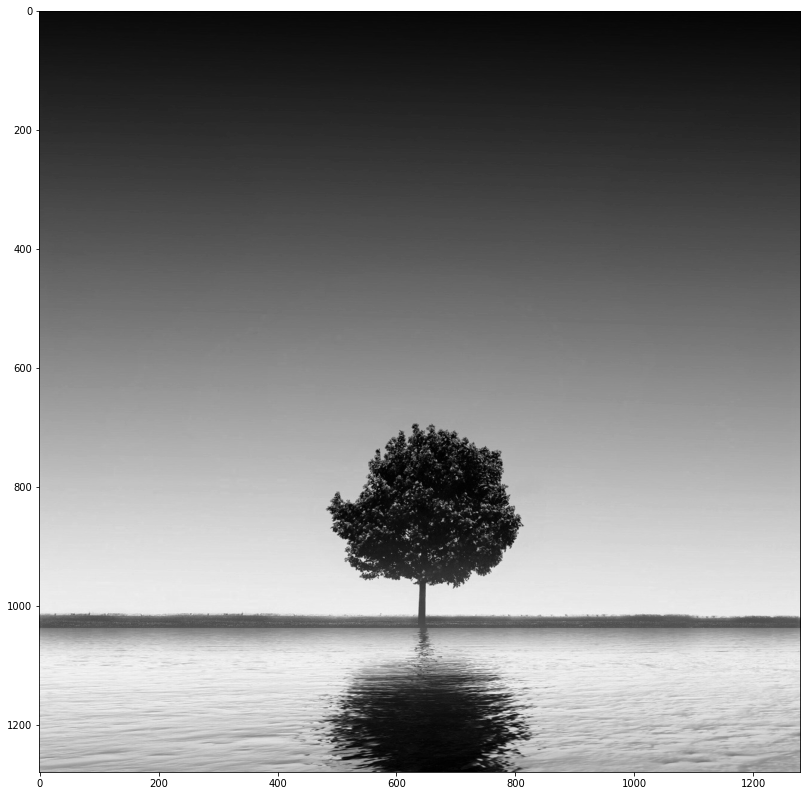

In [2]:
img = mpimg.imread("add_files/TP4_1.png")[:, :, 0] # load this photography as a 2D array

fig, ax = plt.subplots(figsize=(14, 14*img.shape[1]/img.shape[0]))
ax.imshow(img, cmap='gray')
plt.show()

Now, we will try to compress this photography.

1. Print the size of the `img` array. How many floating-point numbers are thus needed to fully define this array ?
2. Compute the SVD of this 2D array with `Q, S_val, P = np.linalg.svd(img)`where Q and P and the matrices introduced above whereas S<sub>val</sub> is a 1D array of M's singular values. How many singular values are there ?
3. Plot the first fifty singular values. If the dropoff is steep, an estimate of this image with the first tens of singular values should be accurate.
4. Compute an approximation of `img` based on the first singular value only. How many floats are required to define this array? Print it to see the result of such a radical compression.
5. Redo this question using the first ten singular value only, then the first one hundred.
6. Obtain the same compressions by simply discarding the right number of pixels of the original photography. How do these results compare to the SVD compression ? Redo this comparison with the second photography TP4_2.png

In [3]:
# Q1
Size_full = img.size
print("This photography is of size", img.shape,
      "and thus requires", Size_full, "numbers to be fully defined")

This photography is of size (1280, 1280) and thus requires 1638400 numbers to be fully defined


In [4]:
# Q2
Q, S_val, P = np.linalg.svd(img)
print("There are ", len(S_val), " singular values")

There are  1280  singular values


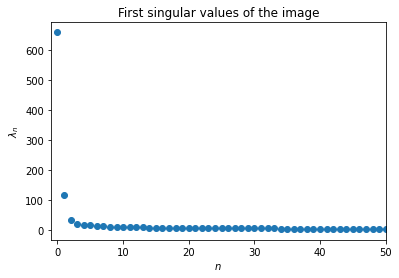

In [5]:
#Q3
plt.plot(S_val, 'o')
plt.xlim(-1, 50)
plt.xlabel("$n$")
plt.ylabel("$\lambda_n$")
plt.title("First singular values of the image")
plt.show()

Approximation based on the first singular value only, ( 0.15631103515625 % of the initial size)


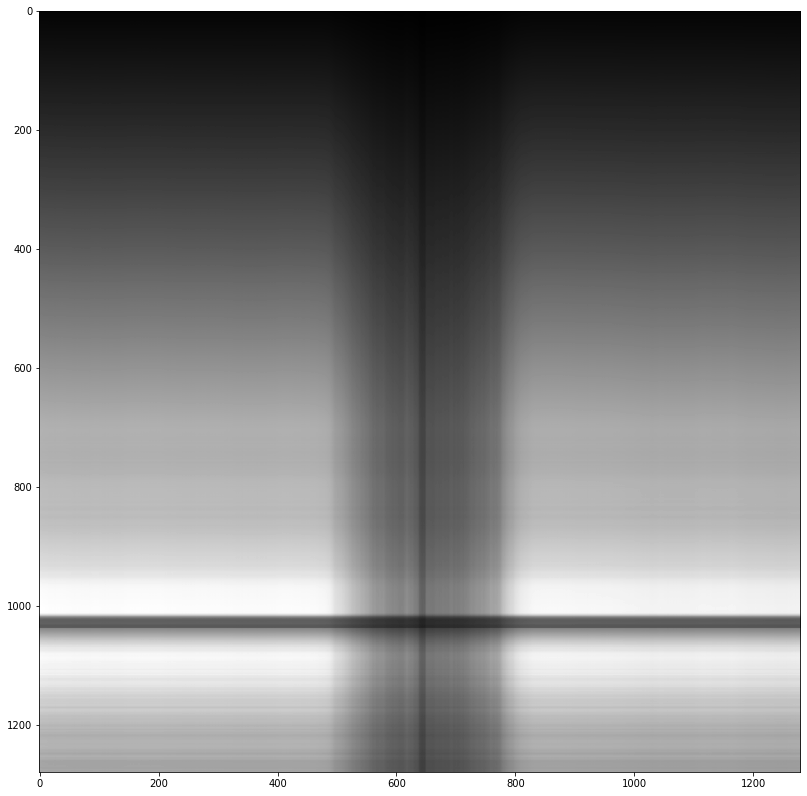

In [6]:
#Q4

img_approx = (Q[:,:1]@ np.diag(S_val[:1]))@ P[:1, :]
Size_part = img.shape[0]+img.shape[1]+1

print("Approximation based on the first singular value only, (",(100*Size_part/Size_full),"% of the initial size)")
fig, ax = plt.subplots(figsize=(14, 14*img_approx.shape[1]/img_approx.shape[0]))
ax.imshow(img_approx, cmap='gray')
plt.show()

Approximation based on the first 1 singular values (0.16% of the initial size)


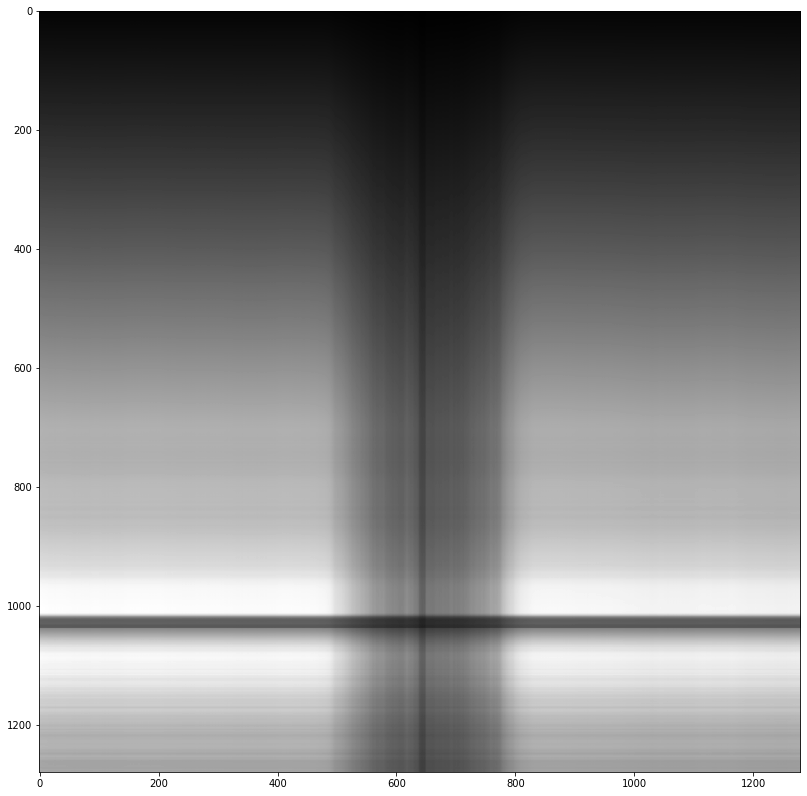

Approximation based on the first 10 singular values (1.56% of the initial size)


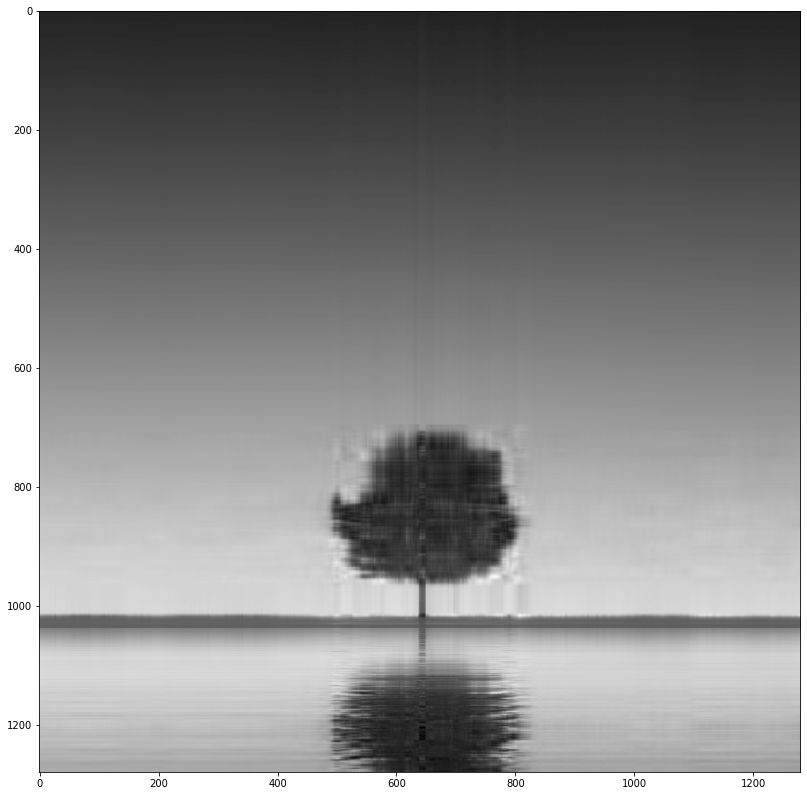

Approximation based on the first 100 singular values (15.63% of the initial size)


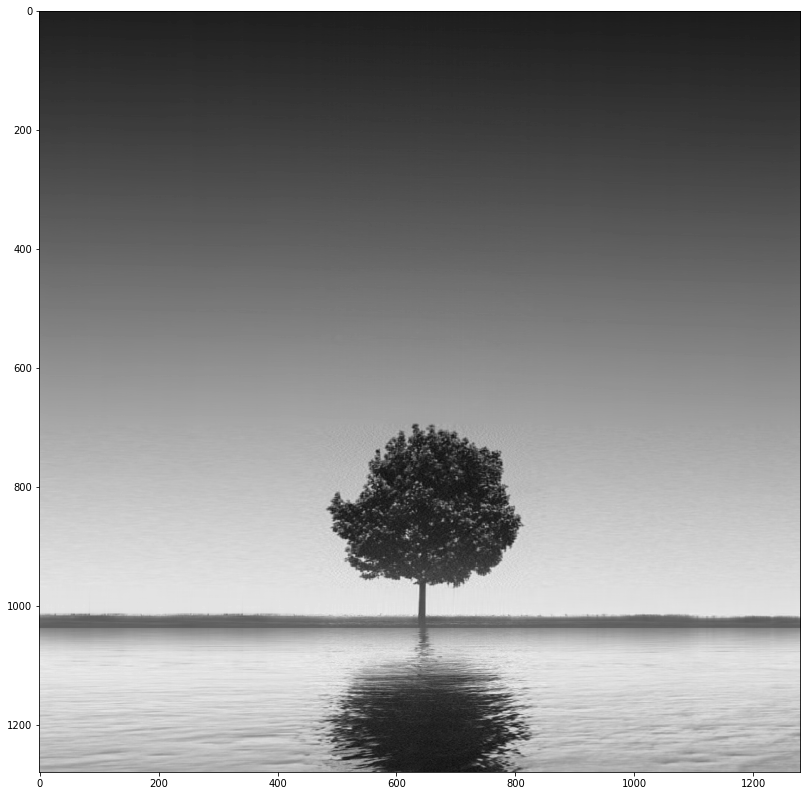

In [7]:
n_SVD_list = [1,10, 100]
for n_SVD in n_SVD_list:

    img_approx = (Q[:, :n_SVD]@ np.diag(S_val[:n_SVD]))@ P[:n_SVD, :]

    Size_part = n_SVD*(img.shape[0]+img.shape[1]+1)
    print("Approximation based on the first", n_SVD, "singular values \
(%.2f%% of the initial size)" % (100*Size_part/Size_full))

    fig, ax = plt.subplots(
        figsize=(14, 14*img_approx.shape[1]/img_approx.shape[0]))
    ax.imshow(img_approx, cmap='gray')
    plt.show()

Approximation based on simple local mean ( 0.1650390625  % of initial size)


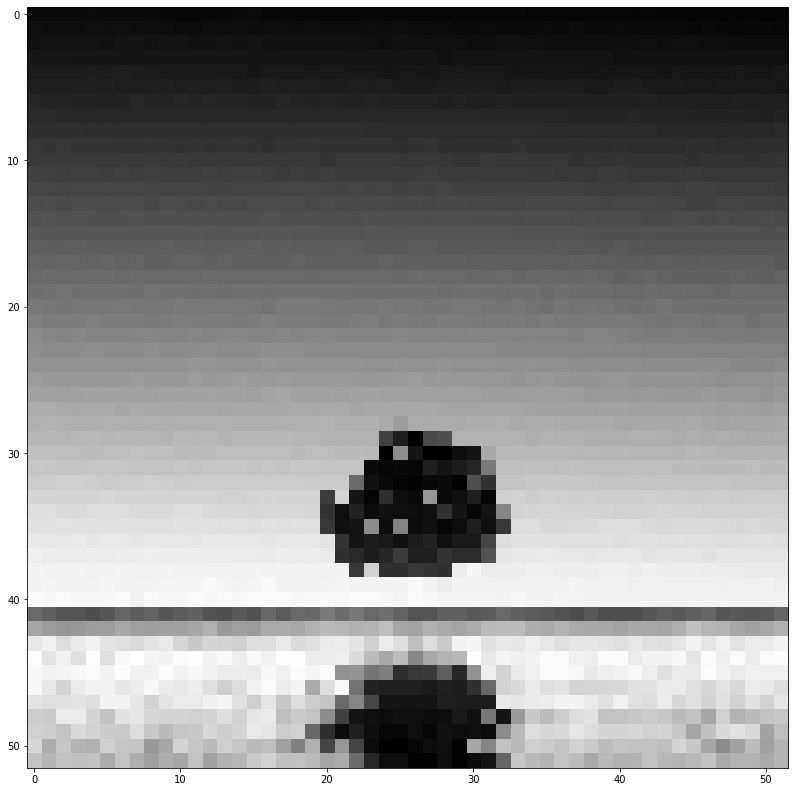

Approximation based on simple local mean ( 1.5625  % of initial size)


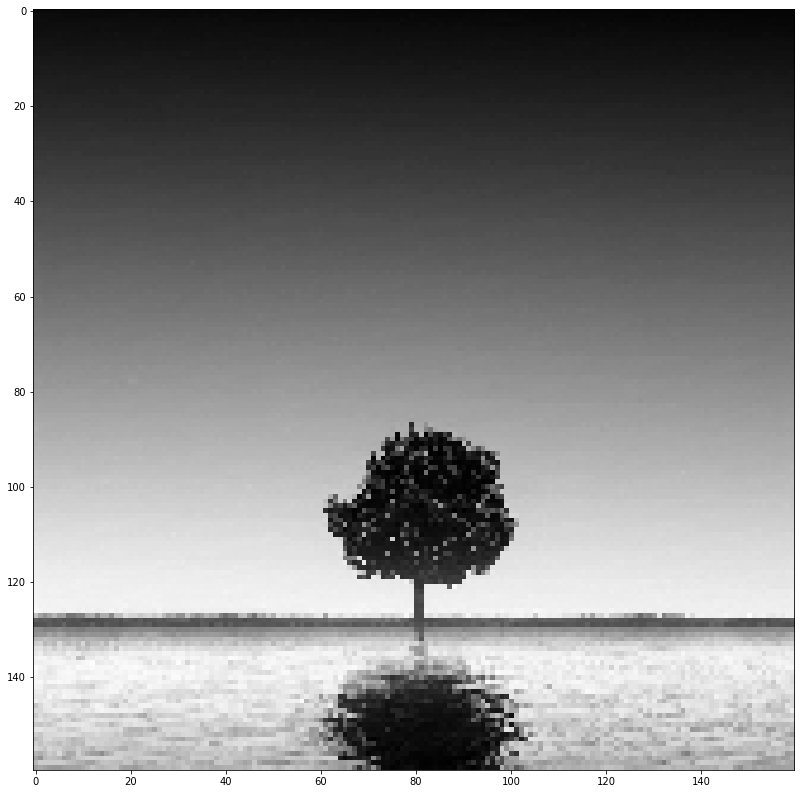

Approximation based on simple local mean ( 11.12847900390625  % of initial size)


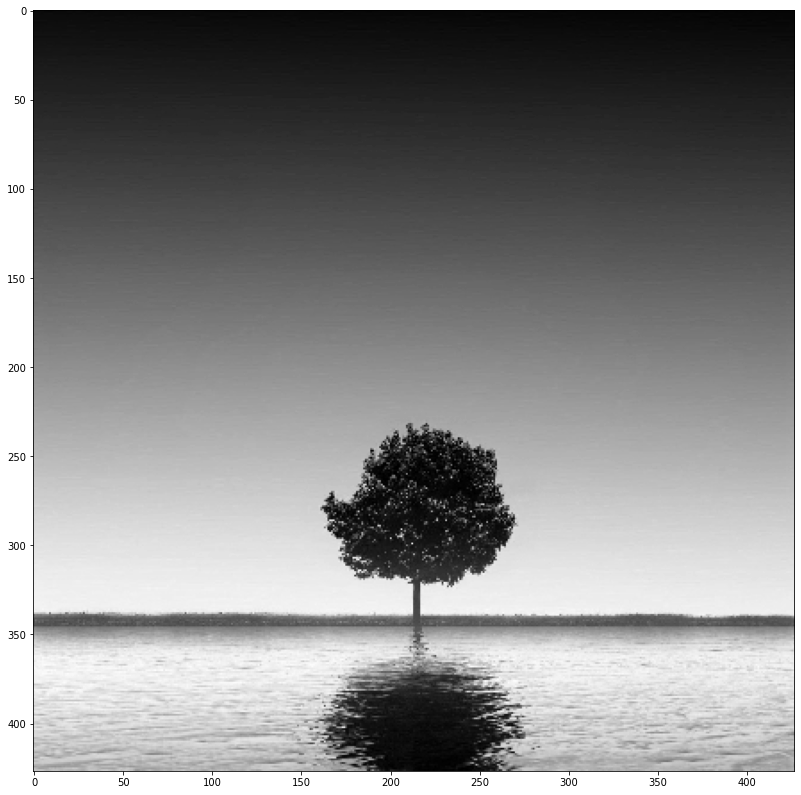

In [8]:
compression = [25,8,3]
for comp in compression:
    img_approx=img[0::comp,0::comp];
    print("Approximation based on simple local mean (", str(100*img_approx.size/img.size)," % of initial size)")
    fig, ax = plt.subplots(figsize=(14, 14*img_approx.shape[1]/img_approx.shape[0]))
    ax.imshow(img_approx, cmap='gray')
    plt.show()

### Exercise 2: the SVD to extract information from datasets

The SVD can also be used to identify correlations in data, e.g. in the measurements of many different sensors as a function of time. It relies on the fact that the various approximates M<sub>i</sub> can be in some case directly interpreted. Imagine we measure the weight and height of N individuals. Presumably, the result would look like that (run the cell below)

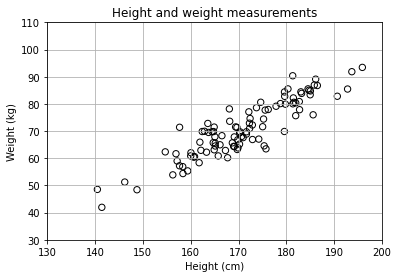

In [9]:
N = 100
weight = 70 + 10 * np.random.normal(size=N)
height = 108 + 0.9 * weight + 5 * np.random.normal(size=N)

M = np.array([height, weight])

plt.ylim([30, 110])
plt.xlim([130, 200])
plt.grid()
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height and weight measurements")
plt.scatter(M[0, :], M[1, :], s=40, facecolors='none', edgecolors='k')
plt.show()

We created this dataset ourselves, but let us forget about that and try to extract the correlation between these two variables only from the dataset. To do so, we must consider dimensionless variables of similar spread and therefore introduce the reduced variables

$$ \tilde{x} = \frac{x - \mathrm{mean}(x)}{\mathrm{std}(x)},$$

1. What is the size of M? Compute `M_reduced`, an array of similar size filled with the same height and weight data as M but of zero mean a unity standard deviation, then print these reduced height and weight measurements.

2. Perform the SVD of this reduced array. How many singular values are there ? 

3. Compute an approximation of `M_reduced` based on its first singular value only, then plot it. On the same graph, show the approximation you would get if only the second singular value is considered.

4. Print Q to check that it consists of two normalized *singular vectors*. Plot again the reduced measurements, then add both these vectors with [plt.arrow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.arrow.html). How can these two vectors be interpreted ?

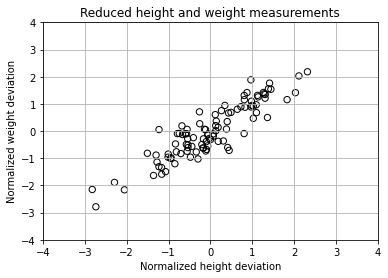

In [10]:
# Q1
mean = M.mean(axis=1).reshape(2, 1)
std = M.std(axis=1).reshape(2, 1)
M_reduced = (M-mean)/std  # Element-wise operations

plt.ylim([-4, 4])
plt.xlim([-4, 4])
plt.grid()
plt.title("Reduced height and weight measurements")
plt.xlabel("Normalized height deviation")
plt.ylabel("Normalized weight deviation")
plt.scatter(M_reduced[0, :], M_reduced[1, :], s=40,
            facecolors='none', edgecolors='k')
plt.show()

In [11]:
# Q2
Q, S_val, P = np.linalg.svd(M_reduced)
print("There are ", len(S_val), " singular values")

There are  2  singular values


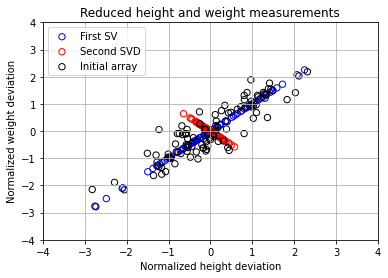

In [12]:
#Q3
M1 = ((Q[:, 0]*S_val[0]).reshape(2, 1))@(P[0, :].reshape(1, N))
M2 = ((Q[:, 1]*S_val[1]).reshape(2, 1))@(P[1, :].reshape(1, N))

plt.ylim([-4, 4])
plt.xlim([-4, 4])
plt.grid()
plt.title("Reduced height and weight measurements")
plt.xlabel("Normalized height deviation")
plt.ylabel("Normalized weight deviation")
plt.scatter(M1[0, :], M1[1, :], s=40, facecolors='none',
            edgecolors='b', label='First SV')
plt.scatter(M2[0, :], M2[1, :], s=40, facecolors='none',
            edgecolors='r', label='Second SVD')
plt.scatter((M1+M2)[0, :], (M1+M2)[1, :], s=40,
            facecolors='none', edgecolors='k', label='Initial array')
plt.legend()
plt.show()

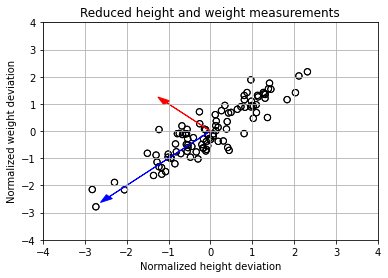

In [13]:
#Q4 
plt.scatter(M_reduced[0, :], M_reduced[1, :], s=40,
            facecolors='none', edgecolors='k')

plt.ylim([-4, 4])
plt.xlim([-4, 4])
plt.grid()
plt.title("Reduced height and weight measurements")
plt.xlabel("Normalized height deviation")
plt.ylabel("Normalized weight deviation")
plt.scatter(M_reduced[0, :], M_reduced[1, :], s=40,
            facecolors='none', edgecolors='k')
plt.arrow(0, 0, np.sqrt(S_val[0])*Q[0, 0], np.sqrt(S_val[0])*Q[1, 0],
         head_width=.2, length_includes_head=True, color='b')
plt.arrow(0, 0, np.sqrt(S_val[1])*Q[0, 1], np.sqrt(S_val[1])*Q[1, 1],
         head_width=.2, length_includes_head=True, color='r')
plt.show()